<a href="https://colab.research.google.com/github/danielkorat/dynamic_ds/blob/main/Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from tqdm import tqdm
from collections import defaultdict
from numpy import log
import numpy as np
from os.path import isfile

from nlp.dataset import plot_frequencies, plot_roc, save_ngram_counts, DS_KWARGS
from nlp.model import train_simple_model
from count_min_param import CountMinEvaluation
from cutoff_count_min_param import LearnedCountMinEvaluation
from plotting.plot_loss_vs_space import PlotLossVsSpace
from torch.optim import Adam

from IPython.display import Image
from IPython.core.display import HTML 

In [4]:
DS_NAME = 'wikicorpus'
LIMIT_PROP = 0.03
prec = LIMIT_PROP * 100

DS_ITEM_COUNTS_PATH = f"nlp/data/{prec}%_wikicorpus_2-grams.npz"

config={
        'ds_name': 'wikicorpus',
        'embed_type': 'Glove',
        'embed_dim': 50,
        'op': 'add',
        'n': 2,
        "limit_prop": 0.03,
        'num_workers': 22,
        "hidden_dim": 64,
        "dropout_prob": 0.0,
        "optim": Adam,
        "learning_rate": 0.001,
        "batch_size": 128
        }

targets, preds, model_size = train_simple_model(config=config,
        args={
            'max_epochs': 30
            })


Global seed set to 123
GPU available: True, used: False
TPU available: None, using: 0 TPU cores




HYPERPARAMS
-----------
{'args': {'max_epochs': 30}}
{'config': {'batch_size': 128,
            'dropout_prob': 0.0,
            'ds_name': 'wikicorpus',
            'embed_dim': 50,
            'embed_type': 'Glove',
            'hidden_dim': 64,
            'learning_rate': 0.001,
            'limit_prop': 0.03,
            'n': 2,
            'num_workers': 22,
            'op': 'add',
            'optim': <class 'torch.optim.adam.Adam'>}}


Model_size: 0.013316
Loading n-grams from: 
/data/home/daniel_nlp/learning-ds/nlp/data/3.0%_wikicorpus_2-grams.npz


/data/home/daniel_nlp/learning-ds/.env/lib/python3.6/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: GPU available but not used. Set the --gpus flag when calling the script.
  warnings.warn(*args, **kwargs)


Saving features to cache file: /data/home/daniel_nlp/learning-ds/nlp/data/3.0%_wikicorpus_2-grams_add_Glove.50_features.npz


1146052it [00:36, 31383.99it/s]


Loading features from: 
/data/home/daniel_nlp/learning-ds/nlp/data/3.0%_wikicorpus_2-grams_add_Glove.50_features.npz


1146052it [00:27, 41707.73it/s]

  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | l1        | Linear  | 3.3 K 
2 | l2        | Linear  | 65    
3 | dropout   | Dropout | 0     
--------------------------------------
3.3 K     Trainable params
0         Non-trainable params
3.3 K     Total params
0.013     Total estimated model params size (MB)


Epoch 0:  57%|█████▋    | 3582/6269 [00:35<00:26, 102.04it/s, loss=0.267, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 0:  99%|█████████▉| 6192/6269 [00:47<00:00, 129.48it/s, loss=0.267, v_num=1]


Epoch 1:  57%|█████▋    | 3582/6269 [00:33<00:24, 108.38it/s, loss=0.261, v_num=1]
Validating: 0it [00:00, ?it/s]
Validating:  89%|████████▉ | 2391/2687 [00:12<00:01, 258.27it/s]


Epoch 2:  57%|█████▋    | 3582/6269 [00:33<00:25, 105.74it/s, loss=0.259, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 2:  95%|█████████▌| 5956/6269 [00:45<00:02, 131.40it/s, loss=0.259, v_num=1]


Epoch 3:  57%|█████▋    | 3582/6269 [00:33<00:24, 108.10it/s, loss=0.257, v_num=1]
Validating: 0it [00:00, ?it/s]
Validating:  83%|████████▎ | 2217/2687 [00:11<00:01, 257.98it/s]


Epoch 4:  57%|█████▋    | 3582/6269 [00:32<00:24, 110.58it/s, loss=0.255, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 4:  91%|█████████▏| 5735/6269 [00:43<00:04, 132.38it/s, loss=0.255, v_num=1]


Epoch 5:  57%|█████▋    | 3582/6269 [00:31<00:23, 113.34it/s, loss=0.254, v_num=1]
Validating: 0it [00:00, ?it/s]
Validating:  78%|███████▊  | 2092/2687 [00:10<00:02, 277.55it/s]


Epoch 6:  57%|█████▋    | 3582/6269 [00:32<00:24, 108.63it/s, loss=0.254, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 6:  87%|████████▋ | 5425/6269 [00:43<00:06, 123.78it/s, loss=0.254, v_num=1]


Epoch 7:  57%|█████▋    | 3582/6269 [00:33<00:24, 107.88it/s, loss=0.253, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 7:  84%|████████▍ | 5270/6269 [00:42<00:08, 124.21it/s, loss=0.253, v_num=1]


Epoch 8:  57%|█████▋    | 3582/6269 [00:32<00:24, 110.57it/s, loss=0.253, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 8:  82%|████████▏ | 5115/6269 [00:41<00:09, 122.49it/s, loss=0.253, v_num=1]


Epoch 9:  57%|█████▋    | 3582/6269 [00:33<00:24, 108.30it/s, loss=0.253, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 9:  79%|███████▉  | 4960/6269 [00:41<00:10, 120.21it/s, loss=0.253, v_num=1]


Epoch 10:  57%|█████▋    | 3582/6269 [00:32<00:24, 109.84it/s, loss=0.252, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 10:  78%|███████▊  | 4867/6269 [00:40<00:11, 120.13it/s, loss=0.252, v_num=1]


Epoch 11:  57%|█████▋    | 3582/6269 [00:32<00:24, 109.15it/s, loss=0.252, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 11:  77%|███████▋  | 4805/6269 [00:40<00:12, 119.70it/s, loss=0.252, v_num=1]


Epoch 12:  57%|█████▋    | 3582/6269 [00:31<00:23, 113.50it/s, loss=0.252, v_num=1]
Validating: 0it [00:00, ?it/s]
Validating:  42%|████▏     | 1130/2687 [00:07<00:06, 233.28it/s]


Epoch 13:  57%|█████▋    | 3582/6269 [00:31<00:23, 113.15it/s, loss=0.251, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 13:  72%|███████▏  | 4526/6269 [00:38<00:14, 118.89it/s, loss=0.251, v_num=1]


Epoch 14:  57%|█████▋    | 3582/6269 [00:32<00:24, 111.84it/s, loss=0.251, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 14:  72%|███████▏  | 4495/6269 [00:38<00:15, 117.48it/s, loss=0.251, v_num=1]


Epoch 15:  57%|█████▋    | 3582/6269 [00:31<00:23, 112.36it/s, loss=0.251, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 15:  70%|██████▉   | 4371/6269 [00:38<00:16, 114.94it/s, loss=0.251, v_num=1]


Epoch 16:  57%|█████▋    | 3582/6269 [00:32<00:24, 109.53it/s, loss=0.251, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 16:  65%|██████▌   | 4092/6269 [00:37<00:19, 109.04it/s, loss=0.251, v_num=1]


Epoch 17:  57%|█████▋    | 3582/6269 [00:32<00:24, 109.78it/s, loss=0.25, v_num=1] 
Validating: 0it [00:00, ?it/s]
Epoch 17:  63%|██████▎   | 3937/6269 [00:38<00:22, 101.96it/s, loss=0.25, v_num=1]


Epoch 18:  57%|█████▋    | 3582/6269 [00:31<00:23, 113.63it/s, loss=0.251, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 18:  63%|██████▎   | 3937/6269 [00:35<00:21, 110.14it/s, loss=0.251, v_num=1]


Epoch 19:  57%|█████▋    | 3582/6269 [00:33<00:25, 107.37it/s, loss=0.251, v_num=1]
Validating: 0it [00:00, ?it/s]
Validating:  10%|▉         | 264/2687 [00:03<02:00, 20.04it/s]


Epoch 20:  57%|█████▋    | 3582/6269 [00:31<00:23, 112.40it/s, loss=0.25, v_num=1] 
Validating: 0it [00:00, ?it/s]
Epoch 20:  60%|██████    | 3782/6269 [00:35<00:23, 106.93it/s, loss=0.25, v_num=1]


Epoch 21:  57%|█████▋    | 3582/6269 [00:32<00:24, 109.68it/s, loss=0.25, v_num=1] 
Validating: 0it [00:00, ?it/s]
Validating:   4%|▍         | 112/2687 [00:02<17:08,  2.50it/s]


Epoch 22:  57%|█████▋    | 3582/6269 [00:33<00:24, 107.88it/s, loss=0.25, v_num=1] 
Validating: 0it [00:00, ?it/s]
Validating:   0%|          | 0/2687 [00:00<?, ?it/s]


Epoch 23:  57%|█████▋    | 3582/6269 [00:32<00:24, 109.72it/s, loss=0.25, v_num=1] 


Validating: 0it [00:00, ?it/s]
Epoch 23:  99%|█████████▉| 6200/6269 [00:45<00:00, 135.90it/s, loss=0.25, v_num=1]


Epoch 24:  57%|█████▋    | 3582/6269 [00:32<00:24, 108.75it/s, loss=0.25, v_num=1] 
Validating: 0it [00:00, ?it/s]
Epoch 24:  97%|█████████▋| 6107/6269 [00:45<00:01, 134.26it/s, loss=0.25, v_num=1]


Epoch 25:  57%|█████▋    | 3582/6269 [00:32<00:24, 110.77it/s, loss=0.25, v_num=1] 
Validating: 0it [00:00, ?it/s]
Epoch 25:  96%|█████████▌| 6014/6269 [00:44<00:01, 135.02it/s, loss=0.25, v_num=1]


Epoch 26:  57%|█████▋    | 3582/6269 [00:32<00:24, 109.98it/s, loss=0.25, v_num=1] 
Validating: 0it [00:00, ?it/s]
Epoch 26:  95%|█████████▍| 5952/6269 [00:44<00:02, 133.94it/s, loss=0.25, v_num=1]


Epoch 27:  57%|█████▋    | 3582/6269 [00:34<00:25, 105.26it/s, loss=0.25, v_num=1] 
Validating: 0it [00:00, ?it/s]
Epoch 27:  93%|█████████▎| 5828/6269 [00:45<00:03, 127.28it/s, loss=0.25, v_num=1]


Epoch 28:  57%|█████▋    | 3582/6269 [00:32<00:24, 109.97it/s, loss=0.25, v_num=1] 
Validating: 0it [00:00, ?it/s]
Epoch 28:  91%|█████████ | 5704/6269 [00:43<00:04, 131.07it/s, loss=0.25, v_num=1]


Epoch 29:  57%|█████▋    | 3582/6269 [00:32<00:24, 109.56it/s, loss=0.25, v_num=1] 
Validating: 0it [00:00, ?it/s]
Validating:  78%|███████▊  | 2091/2687 [00:10<00:02, 272.32it/s]


Epoch 29: 100%|██████████| 6269/6269 [00:46<00:00, 136.20it/s, loss=0.25, v_num=1]
Loading features from: 
/data/home/daniel_nlp/learning-ds/nlp/data/3.0%_wikicorpus_2-grams_add_Glove.50_features.npz


1146052it [00:26, 42688.10it/s]


Testing: 100%|██████████| 2687/2687 [00:13<00:00, 195.42it/s]
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.2447744458913803}
--------------------------------------------------------------------------------
Running prediction on all splits..
dumping test train and validation to:
train test valid
dumping test train and validation predictions to:
/data/home/daniel_nlp/learning-ds/nlp/pred_3.0%_wikicorpus_2-grams_add_Glove.50.npz


HYPERPARAMS
-----------
{'args': {'max_epochs': 30}}
{'config': {'batch_size': 128,
            'dropout_prob': 0.0,
            'ds_name': 'wikicorpus',
            'embed_dim': 50,
            'embed_type': 'Glove',
            'hidden_dim': 64,
            'learning_rate': 0.001,
            'limit_prop': 0.03,
            'n': 2,
            'num_workers': 22,
            'op': 'add',
            'optim': <class 'torch.optim.adam.Adam'>}}


targets: {'train': '/data/home/daniel_nlp

No Skill: ROC AUC=0.50
Learned: ROC AUC=0.82


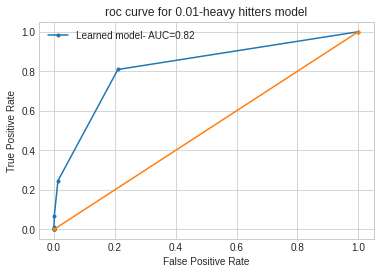

Saving plot...
Done.
Trained model size is : 0.013316 MB


<Figure size 432x288 with 0 Axes>

In [5]:
plot_roc(targets=targets, preds=preds, split='test', hh_frac=0.01)
print(f'Trained model size is : {model_size} MB')

In [25]:
### Get bigrams for wikicorpus. we only used 3% of the data as dataset is huge

if not isfile(DS_ITEM_COUNTS_PATH):
    save_ngram_counts(cache=DS_ITEM_COUNTS_PATH, config=config, **DS_KWARGS[DS_NAME]);

# Actual Bigrams Frequency

there are 1146052 bigrams


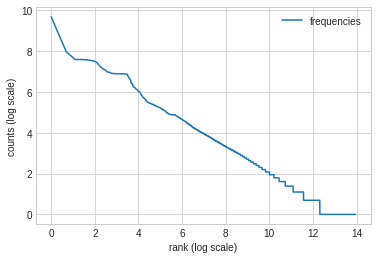

In [26]:
counts = np.load(DS_ITEM_COUNTS_PATH)['y']
print(f'there are {len(counts)} bigrams')
plot_frequencies(counts, 'rank (log scale)', 'counts (log scale)', 'frequencies')

In [27]:
indices = np.argsort(counts)
bigrams = np.load(DS_ITEM_COUNTS_PATH)['x']

print('Top 5 frequent bigrams and their counts:')
print(list(zip(bigrams[indices[-5:]], counts[indices[-5:]])))

print('Bottom 5 frequent bigrams and their counts:')
print(list(zip(bigrams[indices[:5]], counts[indices[:5]])))

Top 5 frequent bigrams and their counts:
[('100 females', 1954), ('65 years', 1982), ('0 till', 1985), ('median income', 2885), ('external links', 16118)]
Bottom 5 frequent bigrams and their counts:
[('purely sacerdotal', 1), ('vehicle shall', 1), ('vehicle insignia', 1), ('vehicle trade', 1), ('vehicle proved', 1)]


# Evaluate Original Count-Min and Count-Sketch

In [28]:
### count sketch ###

DATA = DS_ITEM_COUNTS_PATH
SAVE ='cmin_wikicorpus' #save_results to path
SEED = 69
N_HASHES = [1,2,3,4] 
SPACE_LIST = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.4,1.6,1.8,2,3,4] #in MB
N_WORKERS = 7 #n_processes used 
DATA_NAME ='wikicorpus' # determines which script for loading counts is used
COUNT_SKETCH = True

In [29]:
cme = CountMinEvaluation(space_list=SPACE_LIST, n_hashes_list=N_HASHES,
                        save=SAVE, 
                        n_workers= N_WORKERS,
                        data_name=DATA_NAME,
                        data=DATA,
                        count_sketch=COUNT_SKETCH,
                        seed=SEED)
cme.run()

statistics for nlp/data/3.0%_wikicorpus_2-grams.npz
data #: 1146052, shape (1146052,)
positive ratio: 1.72754, max 16118.000000, min 1.000000


count_sketch: # hashes 1, # buckets 100000 - loss 7.81	 time: 71.63 sec
count_sketch: # hashes 1, # buckets 25000 - loss 20.24	 time: 72.32 sec
count_sketch: # hashes 1, # buckets 400000 - loss 2.93	 time: 73.56 sec
count_sketch: # hashes 1, # buckets 750000 - loss 1.83	 time: 73.82 sec
count_sketch: # hashes 1, # buckets 175000 - loss 5.30	 time: 74.96 sec
count_sketch: # hashes 1, # buckets 250000 - loss 4.14	 time: 75.58 sec
count_sketch: # hashes 2, # buckets 25000 - loss 18.06	 time: 75.69 sec
count_sketch: # hashes 1, # buckets 50000 - loss 12.60	 time: 72.78 sec
count_sketch: # hashes 1, # buckets 125000 - loss 6.72	 time: 73.70 sec
count_sketch: # hashes 1, # buckets 1000000 - loss 1.52	 time: 73.43 sec
count_sketch: # hashes 1, # buckets 300000 - loss 3.66	 time: 73.99 sec
count_sketch: # hashes 2, # buckets 37500 - loss 12.59	 time: 7

In [30]:
### count min ###

COUNT_SKETCH = False

cme = CountMinEvaluation(space_list=SPACE_LIST, n_hashes_list=N_HASHES,
                        save=SAVE, 
                        n_workers= N_WORKERS,
                        data_name=DATA_NAME,
                        data=DATA,
                        count_sketch=COUNT_SKETCH,
                        seed=SEED)
cme.run()

statistics for nlp/data/3.0%_wikicorpus_2-grams.npz
data #: 1146052, shape (1146052,)
positive ratio: 1.72754, max 16118.000000, min 1.000000


count_min: # hashes 1, # buckets 175000 - loss 11.17	 time: 19.17 sec
count_min: # hashes 1, # buckets 400000 - loss 4.84	 time: 19.75 sec
count_min: # hashes 1, # buckets 100000 - loss 19.55	 time: 19.84 sec
count_min: # hashes 1, # buckets 250000 - loss 7.78	 time: 20.09 sec
count_min: # hashes 1, # buckets 750000 - loss 2.57	 time: 20.13 sec
count_min: # hashes 1, # buckets 25000 - loss 78.60	 time: 21.61 sec
count_min: # hashes 2, # buckets 25000 - loss 62.77	 time: 26.17 sec
count_min: # hashes 1, # buckets 200000 - loss 9.82	 time: 18.91 sec
count_min: # hashes 1, # buckets 125000 - loss 15.70	 time: 19.40 sec
count_min: # hashes 1, # buckets 450000 - loss 4.35	 time: 19.72 sec
count_min: # hashes 1, # buckets 300000 - loss 6.59	 time: 19.61 sec
count_min: # hashes 1, # buckets 1000000 - loss 2.05	 time: 21.84 sec
count_min: # hashes 1, #

# Train Estimation Model

## Model Structure

![title](nlp/model.png)

In [3]:
targets, preds, model_size = train_simple_model(config=config,
        args={
            'max_epochs': 10
            })

Global seed set to 123




HYPERPARAMS
-----------
{'args': {'max_epochs': 10}}
{'config': {'batch_size': 128,
            'dropout_prob': 0.0,
            'ds_name': 'wikicorpus',
            'embed_dim': 50,
            'embed_type': 'Glove',
            'hidden_dim': 64,
            'learning_rate': 0.001,
            'limit_prop': 0.03,
            'n': 2,
            'num_workers': 22,
            'op': 'concat',
            'optim': <class 'torch.optim.adam.Adam'>}}


Model_size: 0.026116


GPU available: True, used: False
TPU available: None, using: 0 TPU cores
/data/home/daniel_nlp/learning-ds/.env/lib/python3.6/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: GPU available but not used. Set the --gpus flag when calling the script.
  warnings.warn(*args, **kwargs)


Loading features from: 
/data/home/daniel_nlp/learning-ds/nlp/data/3.0%_wikicorpus_2-grams_concat_Glove.50_features.npz


1146052it [00:20, 55276.74it/s]


Loading features from: 
/data/home/daniel_nlp/learning-ds/nlp/data/3.0%_wikicorpus_2-grams_concat_Glove.50_features.npz


1146052it [00:21, 54014.91it/s]

  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | l1        | Linear  | 6.5 K 
2 | l2        | Linear  | 65    
3 | dropout   | Dropout | 0     
--------------------------------------
6.5 K     Trainable params
0         Non-trainable params
6.5 K     Total params
0.026     Total estimated model params size (MB)


Epoch 0:  57%|█████▋    | 3582/6269 [00:31<00:23, 114.79it/s, loss=0.24, v_num=20] 
Validating: 0it [00:00, ?it/s]
Epoch 1:  57%|█████▋    | 3582/6269 [00:31<00:23, 115.04it/s, loss=0.235, v_num=20]
Validating: 0it [00:00, ?it/s]
Epoch 1:  96%|█████████▌| 6014/6269 [00:43<00:01, 139.18it/s, loss=0.235, v_num=20]


Epoch 2:  57%|█████▋    | 3582/6269 [00:32<00:24, 111.75it/s, loss=0.234, v_num=20]
Validating: 0it [00:00, ?it/s]
Epoch 3:  57%|█████▋    | 3582/6269 [00:31<00:23, 114.90it/s, loss=0.233, v_num=20]
Validating: 0it [00:00, ?it/s]
Epoch 3:  92%|█████████▏| 5797/6269 [00:42<00:03, 136.33it/s, loss=0.233, v_num=20]


Epoch 4:  57%|█████▋    | 3582/6269 [00:32<00:24, 109.11it/s, loss=0.232, v_num=20]
Validating: 0it [00:00, ?it/s]
Epoch 5:  57%|█████▋    | 3582/6269 [00:31<00:23, 112.34it/s, loss=0.232, v_num=20]
Validating: 0it [00:00, ?it/s]
Epoch 5:  89%|████████▊ | 5549/6269 [00:42<00:05, 132.04it/s, loss=0.232, v_num=20]


Epoch 6:  57%|█████▋    | 3582/6269 [00:31<00:23, 112.74it/s, loss=0.231, v_num=20]
Validating: 0it [00:00, ?it/s]
Epoch 7:  57%|█████▋    | 3582/6269 [00:31<00:23, 114.29it/s, loss=0.231, v_num=20]
Validating: 0it [00:00, ?it/s]
Validating:  68%|██████▊   | 1815/2687 [00:09<00:03, 241.39it/s]


Epoch 8:  57%|█████▋    | 3582/6269 [00:31<00:23, 113.98it/s, loss=0.23, v_num=20] 
Validating: 0it [00:00, ?it/s]
Epoch 9:  57%|█████▋    | 3582/6269 [00:30<00:23, 115.94it/s, loss=0.23, v_num=20] 
Validating: 0it [00:00, ?it/s]
Epoch 9:  85%|████████▍ | 5312/6269 [00:40<00:07, 132.28it/s, loss=0.23, v_num=20]


Epoch 9: 100%|██████████| 6269/6269 [00:44<00:00, 141.69it/s, loss=0.23, v_num=20]
Loading features from: 
/data/home/daniel_nlp/learning-ds/nlp/data/3.0%_wikicorpus_2-grams_concat_Glove.50_features.npz


1146052it [00:28, 40773.82it/s]


Testing: 100%|██████████| 2687/2687 [00:12<00:00, 209.24it/s]
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.23505373299121857}
--------------------------------------------------------------------------------
Running prediction on all splits..
dumping test train and validation to:
train test valid
dumping test train and validation predictions to:
/data/home/daniel_nlp/learning-ds/nlp/pred_3.0%_wikicorpus_2-grams_concat_Glove.50.npz


HYPERPARAMS
-----------
{'args': {'max_epochs': 10}}
{'config': {'batch_size': 128,
            'dropout_prob': 0.0,
            'ds_name': 'wikicorpus',
            'embed_dim': 50,
            'embed_type': 'Glove',
            'hidden_dim': 64,
            'learning_rate': 0.001,
            'limit_prop': 0.03,
            'n': 2,
            'num_workers': 22,
            'op': 'concat',
            'optim': <class 'torch.optim.adam.Adam'>}}


targets: {'train': '/data/home/dan

### Model Size

In [17]:
print(f'Trained model size is : {model_size} MB')

Trained model size is : 0.026116 MB


No Skill: ROC AUC=0.50
Learned: ROC AUC=0.84


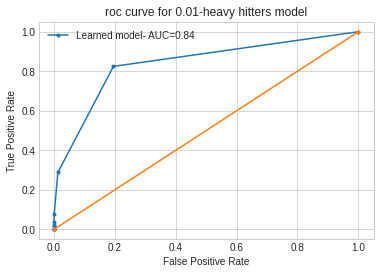

Saving plot...
Done.


<Figure size 432x288 with 0 Axes>

In [39]:
plot_roc(targets=targets, preds=preds, split='test', hh_frac=0.01)

In [19]:
TEST_RESULTS =[f"./nlp/pred_{prec}%_wikicorpus_2-grams_concat_CharNGram.100.npz"]
VALID_RESULTS = [f"./nlp/pred_{prec}%_wikicorpus_2-grams_concat_CharNGram.100.npz"]
TEST_DATA = [f"./nlp/true_{prec}%_wikicorpus_2-grams_concat_CharNGram.100_test.npz"]
VALID_DATA = [f"./nlp/true_{prec}%_wikicorpus_2-grams_concat_CharNGram.100_valid.npz"]
LOOKUP_DATA = [f"./nlp/true_{prec}%_wikicorpus_2-grams_concat_CharNGram.100_train.npz"]
SAVE ='cmin_wikicorpus'
SEED = 69
SPACE_LIST = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.4, 1.6, 1.8, 2, 3, 4]
N_HASHES_LIST = [1, 2, 3, 4]
PERFECT_ORDER = False
N_WORKERS = 7
DATA_NAME ='wikicorpus'
COUNT_SKETCH = False

In [7]:
print('Running: no lookup, only using learned model count min...')

LOOKUP_DATA2 = None
PERFECT_ORDER = False

lcm = LearnedCountMinEvaluation(test_results=TEST_RESULTS, 
                                valid_results=VALID_RESULTS,
                                test_data=TEST_DATA, 
                                valid_data=VALID_DATA,
                                lookup_data=LOOKUP_DATA2,
                                save=SAVE, 
                                seed=SEED,
                                space_list=SPACE_LIST,
                                n_hashes_list=N_HASHES_LIST,
                                perfect_order=PERFECT_ORDER,
                                n_workers=N_WORKERS, 
                                data_name=DATA_NAME,
                                count_sketch=COUNT_SKETCH
                            )
lcm.run()

Running: no lookup, only using learned model count min...
/data/home/daniel_nlp/learning-ds/.env/lib/python3.6/site-packages/ipykernel_launcher.py -f /data/home/daniel_nlp/.local/share/jupyter/runtime/kernel-93763452-ac80-4e38-8d0a-b34d66312c56.json

statistics for valid data:
./nlp/true_3.0%_wikicorpus_2-grams_concat_CharNGram.100_valid.npz
data #: 343815, shape (343815,)
positive ratio: 1.72988, max 1985.000000, min 1.000000


statistics for test data:
./nlp/true_3.0%_wikicorpus_2-grams_concat_CharNGram.100_test.npz
data #: 343815, shape (343815,)
positive ratio: 1.69171, max 1982.000000, min 1.000000


data loading time: 0.6 sec
	loss_cf 0.00	loss_rd 14.52	loss_avg 10.66
cutoff_count_min_param: bcut: 35000, # hashes 1, # buckets 65000 - loss 10.66	 time: 5.44 sec
	loss_cf 0.00	loss_rd 14.60	loss_avg 12.58
cutoff_count_min_param: bcut: 7500, # hashes 1, # buckets 42500 - loss 12.58	 time: 5.76 sec
	loss_cf 0.00	loss_rd 24.79	loss_avg 23.33
cutoff_count_min_param: bcut: 1250, # hashes

cutoff_count_min_param: bcut: 12500, # hashes 2, # buckets 62500 - loss 5.66	 time: 7.78 sec
	loss_cf 0.00	loss_rd 32.58	loss_avg 26.62
cutoff_count_min_param: bcut: 17500, # hashes 1, # buckets 32500 - loss 26.62	 time: 5.49 sec
	loss_cf 0.00	loss_rd 104.31	loss_avg 77.12
cutoff_count_min_param: bcut: 33750, # hashes 2, # buckets 37500 - loss 77.12	 time: 7.37 sec
	loss_cf 0.00	loss_rd 20.02	loss_avg 15.57
cutoff_count_min_param: bcut: 25000, # hashes 3, # buckets 41666 - loss 15.57	 time: 9.12 sec
	loss_cf 0.00	loss_rd 20.25	loss_avg 17.12
cutoff_count_min_param: bcut: 11250, # hashes 3, # buckets 28750 - loss 17.12	 time: 9.68 sec
	loss_cf 0.00	loss_rd 41.51	loss_avg 36.21
cutoff_count_min_param: bcut: 6250, # hashes 1, # buckets 18750 - loss 36.21	 time: 6.56 sec
	loss_cf 0.00	loss_rd 25.72	loss_avg 23.69
cutoff_count_min_param: bcut: 2500, # hashes 3, # buckets 17500 - loss 23.69	 time: 10.66 sec
	loss_cf 0.00	loss_rd 54.81	loss_avg 44.78
cutoff_count_min_param: bcut: 17500, # has

cutoff_count_min_param: bcut: 10000, # hashes 2, # buckets 100000 - loss 2.83	 time: 7.84 sec
	loss_cf 0.00	loss_rd 29.21	loss_avg 18.21
cutoff_count_min_param: bcut: 60000, # hashes 3, # buckets 70000 - loss 18.21	 time: 8.14 sec
	loss_cf 0.00	loss_rd 18.64	loss_avg 13.47
cutoff_count_min_param: bcut: 37500, # hashes 3, # buckets 54166 - loss 13.47	 time: 9.13 sec
	loss_cf 0.00	loss_rd 12.33	loss_avg 7.69
cutoff_count_min_param: bcut: 60000, # hashes 4, # buckets 80000 - loss 7.69	 time: 9.81 sec
	loss_cf 0.00	loss_rd 2.81	loss_avg 2.08
cutoff_count_min_param: bcut: 33750, # hashes 1, # buckets 191250 - loss 2.08	 time: 6.03 sec
	loss_cf 0.00	loss_rd 10.22	loss_avg 7.50
cutoff_count_min_param: bcut: 35000, # hashes 4, # buckets 61250 - loss 7.50	 time: 10.04 sec
	loss_cf 0.00	loss_rd 5.87	loss_avg 3.51
cutoff_count_min_param: bcut: 70000, # hashes 1, # buckets 130000 - loss 3.51	 time: 5.03 sec
	loss_cf 0.00	loss_rd 6.00	loss_avg 4.74
cutoff_count_min_param: bcut: 22500, # hashes 2, #

cutoff_count_min_param: bcut: 122500, # hashes 4, # buckets 148750 - loss 3.13	 time: 7.85 sec
	loss_cf 0.00	loss_rd 1.58	loss_avg 0.91
cutoff_count_min_param: bcut: 80000, # hashes 2, # buckets 200000 - loss 0.91	 time: 6.47 sec
	loss_cf 0.00	loss_rd 7.36	loss_avg 4.09
cutoff_count_min_param: bcut: 90000, # hashes 1, # buckets 135000 - loss 4.09	 time: 4.74 sec
	loss_cf 0.00	loss_rd 3.63	loss_avg 2.02
cutoff_count_min_param: bcut: 90000, # hashes 2, # buckets 150000 - loss 2.02	 time: 6.09 sec
	loss_cf 0.00	loss_rd 3.77	loss_avg 1.69
cutoff_count_min_param: bcut: 140000, # hashes 1, # buckets 210000 - loss 1.69	 time: 4.14 sec
	loss_cf 0.00	loss_rd 1.85	loss_avg 1.53
cutoff_count_min_param: bcut: 15000, # hashes 1, # buckets 285000 - loss 1.53	 time: 5.51 sec
	loss_cf 0.00	loss_rd 3.38	loss_avg 2.26
cutoff_count_min_param: bcut: 50000, # hashes 2, # buckets 125000 - loss 2.26	 time: 7.19 sec
	loss_cf 0.00	loss_rd 2.16	loss_avg 1.58
cutoff_count_min_param: bcut: 35000, # hashes 3, # bu

cutoff_count_min_param: bcut: 175000, # hashes 2, # buckets 250000 - loss 0.62	 time: 4.67 sec
	loss_cf 0.00	loss_rd 0.01	loss_avg 0.00
cutoff_count_min_param: bcut: 337500, # hashes 4, # buckets 356250 - loss 0.00	 time: 1.77 sec
	loss_cf 0.00	loss_rd 1.88	loss_avg 0.95
cutoff_count_min_param: bcut: 112500, # hashes 3, # buckets 187500 - loss 0.95	 time: 6.92 sec
	loss_cf 0.00	loss_rd 0.08	loss_avg 0.02
cutoff_count_min_param: bcut: 250000, # hashes 3, # buckets 416666 - loss 0.02	 time: 3.94 sec
	loss_cf 0.00	loss_rd 11.17	loss_avg 4.01
cutoff_count_min_param: bcut: 180000, # hashes 3, # buckets 193333 - loss 4.01	 time: 5.54 sec
	loss_cf 0.00	loss_rd 2.13	loss_avg 0.79
cutoff_count_min_param: bcut: 175000, # hashes 3, # buckets 225000 - loss 0.79	 time: 5.53 sec
	loss_cf 0.00	loss_rd 0.46	loss_avg 0.31
cutoff_count_min_param: bcut: 50000, # hashes 1, # buckets 950000 - loss 0.31	 time: 5.35 sec
	loss_cf 0.00	loss_rd 0.08	loss_avg 0.02
cutoff_count_min_param: bcut: 250000, # hashes 4

cutoff_count_min_param: bcut: 25000, # hashes 2, # buckets 250000 - loss 0.71	 time: 7.19 sec
	loss_cf 0.00	loss_rd 0.24	loss_avg 0.05
cutoff_count_min_param: bcut: 250000, # hashes 1, # buckets 750000 - loss 0.05	 time: 2.64 sec
	loss_cf 0.00	loss_rd 1.17	loss_avg 0.56
cutoff_count_min_param: bcut: 125000, # hashes 2, # buckets 250000 - loss 0.56	 time: 5.60 sec
	loss_cf 0.00	loss_rd 1.91	loss_avg 1.16
cutoff_count_min_param: bcut: 67500, # hashes 4, # buckets 146250 - loss 1.16	 time: 9.16 sec
	loss_cf 0.00	loss_rd 0.61	loss_avg 0.36
cutoff_count_min_param: bcut: 75000, # hashes 4, # buckets 225000 - loss 0.36	 time: 8.85 sec
	loss_cf 0.00	loss_rd 0.10	loss_avg 0.02
cutoff_count_min_param: bcut: 250000, # hashes 2, # buckets 500000 - loss 0.02	 time: 3.39 sec
	loss_cf 0.00	loss_rd 1.21	loss_avg 0.67
cutoff_count_min_param: bcut: 90000, # hashes 1, # buckets 360000 - loss 0.67	 time: 4.36 sec
	loss_cf 0.00	loss_rd 0.57	loss_avg 0.29
cutoff_count_min_param: bcut: 112500, # hashes 1, # 

In [8]:
print('Running: perfect oracle... only using learned model count min...')

LOOKUP_DATA3=None
PERFECT_ORDER=True

lcm = LearnedCountMinEvaluation(test_results=TEST_RESULTS, 
                                valid_results=VALID_RESULTS,
                                test_data=TEST_DATA, 
                                valid_data=VALID_DATA,
                                lookup_data=LOOKUP_DATA3,
                                save=SAVE, 
                                seed=SEED,
                                space_list=SPACE_LIST,
                                n_hashes_list=N_HASHES_LIST,
                                perfect_order=PERFECT_ORDER,
                                n_workers=N_WORKERS, 
                                data_name=DATA_NAME,
                                count_sketch=COUNT_SKETCH
                            )
lcm.run()

Running: perfect oracle... only using learned model count min...
/data/home/daniel_nlp/learning-ds/.env/lib/python3.6/site-packages/ipykernel_launcher.py -f /data/home/daniel_nlp/.local/share/jupyter/runtime/kernel-93763452-ac80-4e38-8d0a-b34d66312c56.json

statistics for valid data:
./nlp/true_3.0%_wikicorpus_2-grams_concat_CharNGram.100_valid.npz
data #: 343815, shape (343815,)
positive ratio: 1.72988, max 1985.000000, min 1.000000


statistics for test data:
./nlp/true_3.0%_wikicorpus_2-grams_concat_CharNGram.100_test.npz
data #: 343815, shape (343815,)
positive ratio: 1.69171, max 1982.000000, min 1.000000


data loading time: 0.7 sec
	loss_cf 0.00	loss_rd 11.36	loss_avg 6.51
cutoff_count_min_param_perfect: bcut: 35000, # hashes 1, # buckets 65000 - loss 6.51	 time: 5.23 sec
	loss_cf 0.00	loss_rd 10.32	loss_avg 6.72
cutoff_count_min_param_perfect: bcut: 18750, # hashes 1, # buckets 56250 - loss 6.72	 time: 5.47 sec
	loss_cf 0.00	loss_rd 12.62	loss_avg 9.38
cutoff_count_min_param_pe

cutoff_count_min_param_perfect: bcut: 2500, # hashes 2, # buckets 25000 - loss 14.49	 time: 7.80 sec
	loss_cf 0.00	loss_rd 13.14	loss_avg 9.27
cutoff_count_min_param_perfect: bcut: 11250, # hashes 2, # buckets 37500 - loss 9.27	 time: 7.97 sec
	loss_cf 0.00	loss_rd 69.34	loss_avg 46.90
cutoff_count_min_param_perfect: bcut: 15000, # hashes 4, # buckets 20000 - loss 46.90	 time: 11.57 sec
	loss_cf 0.00	loss_rd 106.88	loss_avg 83.01
cutoff_count_min_param_perfect: bcut: 5000, # hashes 4, # buckets 8750 - loss 83.01	 time: 11.76 sec
	loss_cf 0.00	loss_rd 45.74	loss_avg 26.40
cutoff_count_min_param_perfect: bcut: 33750, # hashes 1, # buckets 41250 - loss 26.40	 time: 5.25 sec
	loss_cf 0.00	loss_rd 12.25	loss_avg 7.57
cutoff_count_min_param_perfect: bcut: 25000, # hashes 2, # buckets 50000 - loss 7.57	 time: 9.83 sec
	loss_cf 0.00	loss_rd 6.26	loss_avg 4.35
cutoff_count_min_param_perfect: bcut: 12500, # hashes 2, # buckets 62500 - loss 4.35	 time: 7.58 sec
	loss_cf 0.00	loss_rd 26.17	loss_av

cutoff_count_min_param_perfect: bcut: 15000, # hashes 3, # buckets 55000 - loss 4.67	 time: 9.18 sec
	loss_cf 0.00	loss_rd 9.71	loss_avg 4.75
cutoff_count_min_param_perfect: bcut: 60000, # hashes 1, # buckets 90000 - loss 4.75	 time: 4.92 sec
	loss_cf 0.00	loss_rd 5.73	loss_avg 2.80
cutoff_count_min_param_perfect: bcut: 60000, # hashes 2, # buckets 100000 - loss 2.80	 time: 6.96 sec
	loss_cf 0.00	loss_rd 3.91	loss_avg 2.47
cutoff_count_min_param_perfect: bcut: 22500, # hashes 3, # buckets 82500 - loss 2.47	 time: 9.01 sec
	loss_cf 0.00	loss_rd 2.37	loss_avg 1.70
cutoff_count_min_param_perfect: bcut: 10000, # hashes 1, # buckets 190000 - loss 1.70	 time: 5.43 sec
	loss_cf 0.00	loss_rd 6.94	loss_avg 3.98
cutoff_count_min_param_perfect: bcut: 35000, # hashes 3, # buckets 70000 - loss 3.98	 time: 8.71 sec
	loss_cf 0.00	loss_rd 11.21	loss_avg 6.33
cutoff_count_min_param_perfect: bcut: 37500, # hashes 2, # buckets 62500 - loss 6.33	 time: 7.87 sec
	loss_cf 0.00	loss_rd 16.85	loss_avg 8.24
cu

cutoff_count_min_param_perfect: bcut: 112500, # hashes 2, # buckets 125000 - loss 6.26	 time: 6.04 sec
	loss_cf 0.00	loss_rd 1.67	loss_avg 0.82
cutoff_count_min_param_perfect: bcut: 60000, # hashes 3, # buckets 153333 - loss 0.82	 time: 8.19 sec
	loss_cf 0.00	loss_rd 6.29	loss_avg 2.80
cutoff_count_min_param_perfect: bcut: 78750, # hashes 2, # buckets 112500 - loss 2.80	 time: 6.66 sec
	loss_cf 0.00	loss_rd 3.49	loss_avg 1.58
cutoff_count_min_param_perfect: bcut: 75000, # hashes 3, # buckets 125000 - loss 1.58	 time: 7.87 sec
	loss_cf 0.00	loss_rd 3.64	loss_avg 2.06
cutoff_count_min_param_perfect: bcut: 37500, # hashes 3, # buckets 95833 - loss 2.06	 time: 9.21 sec
	loss_cf 0.00	loss_rd 1.21	loss_avg 0.70
cutoff_count_min_param_perfect: bcut: 35000, # hashes 1, # buckets 315000 - loss 0.70	 time: 5.33 sec
	loss_cf 0.00	loss_rd 4.26	loss_avg 1.59
cutoff_count_min_param_perfect: bcut: 122500, # hashes 3, # buckets 157500 - loss 1.59	 time: 7.51 sec
	loss_cf 0.00	loss_rd 23.36	loss_avg 9.

cutoff_count_min_param_perfect: bcut: 45000, # hashes 4, # buckets 97500 - loss 1.91	 time: 10.71 sec
	loss_cf 0.00	loss_rd 1.70	loss_avg 0.68
cutoff_count_min_param_perfect: bcut: 105000, # hashes 1, # buckets 245000 - loss 0.68	 time: 4.13 sec
	loss_cf 0.00	loss_rd 1.59	loss_avg 0.89
cutoff_count_min_param_perfect: bcut: 40000, # hashes 3, # buckets 146666 - loss 0.89	 time: 9.38 sec
	loss_cf 0.00	loss_rd 4.74	loss_avg 1.46
cutoff_count_min_param_perfect: bcut: 160000, # hashes 3, # buckets 186666 - loss 1.46	 time: 6.12 sec
	loss_cf 0.00	loss_rd 5.38	loss_avg 2.32
cutoff_count_min_param_perfect: bcut: 87500, # hashes 2, # buckets 125000 - loss 2.32	 time: 6.62 sec
	loss_cf 0.00	loss_rd 3.40	loss_avg 1.05
cutoff_count_min_param_perfect: bcut: 160000, # hashes 2, # buckets 200000 - loss 1.05	 time: 5.35 sec
	loss_cf 0.00	loss_rd 1.62	loss_avg 0.79
cutoff_count_min_param_perfect: bcut: 60000, # hashes 1, # buckets 240000 - loss 0.79	 time: 5.32 sec
	loss_cf 0.00	loss_rd 2.39	loss_avg 0

cutoff_count_min_param_perfect: bcut: 350000, # hashes 3, # buckets 450000 - loss 0.00	 time: 1.60 sec
	loss_cf 0.00	loss_rd 1.07	loss_avg 0.56
cutoff_count_min_param_perfect: bcut: 50000, # hashes 3, # buckets 183333 - loss 0.56	 time: 8.22 sec
	loss_cf 0.00	loss_rd 0.00	loss_avg 0.00
cutoff_count_min_param_perfect: bcut: 350000, # hashes 4, # buckets 425000 - loss 0.00	 time: 1.57 sec
	loss_cf 0.00	loss_rd 3.40	loss_avg 0.82
cutoff_count_min_param_perfect: bcut: 200000, # hashes 4, # buckets 225000 - loss 0.82	 time: 5.58 sec
	loss_cf 0.00	loss_rd 0.00	loss_avg 0.00
cutoff_count_min_param_perfect: bcut: 400000, # hashes 1, # buckets 600000 - loss 0.00	 time: 1.57 sec
	loss_cf 0.00	loss_rd 1.98	loss_avg 0.69
cutoff_count_min_param_perfect: bcut: 135000, # hashes 3, # buckets 195000 - loss 0.69	 time: 6.73 sec
	loss_cf 0.00	loss_rd 0.00	loss_avg 0.00
cutoff_count_min_param_perfect: bcut: 400000, # hashes 2, # buckets 500000 - loss 0.00	 time: 1.52 sec
	loss_cf 0.00	loss_rd 2.37	loss_av

	loss_cf 0.00	loss_rd 1.30	loss_avg 0.61
cutoff_count_min_param_perfect: bcut: 70000, # hashes 1, # buckets 280000 - loss 0.61	 time: 5.01 sec
	loss_cf 0.00	loss_rd 2.07	loss_avg 1.10
cutoff_count_min_param_perfect: bcut: 50000, # hashes 1, # buckets 200000 - loss 1.10	 time: 5.25 sec
	loss_cf 0.00	loss_rd 2.51	loss_avg 1.52
cutoff_count_min_param_perfect: bcut: 30000, # hashes 1, # buckets 170000 - loss 1.52	 time: 5.54 sec
	loss_cf 0.00	loss_rd 2.17	loss_avg 1.28
cutoff_count_min_param_perfect: bcut: 33750, # hashes 1, # buckets 191250 - loss 1.28	 time: 5.57 sec
	loss_cf 0.00	loss_rd 1.61	loss_avg 0.81
cutoff_count_min_param_perfect: bcut: 60000, # hashes 1, # buckets 240000 - loss 0.81	 time: 5.91 sec
	loss_cf 0.00	loss_rd 0.01	loss_avg 0.00
cutoff_count_min_param_perfect: bcut: 337500, # hashes 4, # buckets 356250 - loss 0.00	 time: 1.63 sec
	loss_cf 0.00	loss_rd 0.00	loss_avg 0.00
cutoff_count_min_param_perfect: bcut: 350000, # hashes 1, # buckets 650000 - loss 0.00	 time: 1.60 s

# Plot Count-Min

plot testing results for perfect CCM


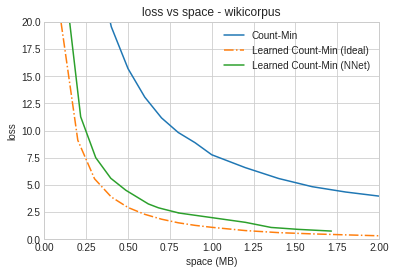

In [40]:
ALGO = 'Count-Min'
COUNT_MIN = 'param_results/count_min/cmin_wikicorpus.npz'
LEARNED = ['param_results/cutoff_count_min_param/cmin_wikicorpus_test.npz']
PERFECT = 'param_results/cutoff_count_min_param_perfect/cmin_wikicorpus_test.npz'
LOOKUP_TABLE ='param_results/lookup_table_count_min/cmin_wikicorpus_test.npz' 
MODEL_NAMES = ["Learned Count-Min (NNet)"]
TITLE = 'wikicorpus'
MODEL_SIZES = [model_size]
LOOKUP_SIZE = [0.0035]
X_LIM = [0,2]
Y_LIM = [0,20]

plvs = PlotLossVsSpace(
        count_min=COUNT_MIN,
        learned_cmin=LEARNED,
        model_names=MODEL_NAMES,
        perfect_ccm=PERFECT,
        lookup_table_ccm=None,
        model_sizes=MODEL_SIZES,
        lookup_size=LOOKUP_SIZE,
        x_lim=X_LIM,
        y_lim=Y_LIM,
        title=TITLE,
        algo=ALGO,
    )

plvs.run()

In [41]:
print('Running: no lookup, only using learned model count sketch...')

LOOKUP_DATA2 = None
PERFECT_ORDER = False

lcm = LearnedCountMinEvaluation(test_results=TEST_RESULTS, 
                                valid_results=VALID_RESULTS,
                                test_data=TEST_DATA, 
                                valid_data=VALID_DATA,
                                lookup_data=LOOKUP_DATA2,
                                save=SAVE, 
                                seed=SEED,
                                space_list=SPACE_LIST,
                                n_hashes_list=N_HASHES_LIST,
                                perfect_order=PERFECT_ORDER,
                                n_workers=N_WORKERS, 
                                data_name=DATA_NAME,
                                count_sketch=COUNT_SKETCH
                            )
lcm.run()

Running: no lookup, only using learned model count sketch...
/data/home/daniel_nlp/learning-ds/.env/lib/python3.6/site-packages/ipykernel_launcher.py -f /data/home/daniel_nlp/.local/share/jupyter/runtime/kernel-93763452-ac80-4e38-8d0a-b34d66312c56.json

statistics for valid data:
./nlp/true_3.0%_wikicorpus_2-grams_concat_CharNGram.100_valid.npz
data #: 343815, shape (343815,)
positive ratio: 1.72988, max 1985.000000, min 1.000000


statistics for test data:
./nlp/true_3.0%_wikicorpus_2-grams_concat_CharNGram.100_test.npz
data #: 343815, shape (343815,)
positive ratio: 1.69171, max 1982.000000, min 1.000000


data loading time: 0.6 sec
	loss_cf 0.00	loss_rd 14.52	loss_avg 10.66
cutoff_count_min_param: bcut: 35000, # hashes 1, # buckets 65000 - loss 10.66	 time: 5.47 sec
	loss_cf 0.00	loss_rd 12.95	loss_avg 10.50
cutoff_count_min_param: bcut: 18750, # hashes 1, # buckets 56250 - loss 10.50	 time: 5.64 sec
	loss_cf 0.00	loss_rd 24.79	loss_avg 23.33
cutoff_count_min_param: bcut: 1250, # ha

cutoff_count_min_param: bcut: 11250, # hashes 3, # buckets 28750 - loss 17.12	 time: 9.37 sec
	loss_cf 0.00	loss_rd 58.93	loss_avg 43.57
cutoff_count_min_param: bcut: 33750, # hashes 1, # buckets 41250 - loss 43.57	 time: 5.66 sec
	loss_cf 0.00	loss_rd 6.74	loss_avg 5.66
cutoff_count_min_param: bcut: 12500, # hashes 2, # buckets 62500 - loss 5.66	 time: 7.67 sec
	loss_cf 0.00	loss_rd 32.58	loss_avg 26.62
cutoff_count_min_param: bcut: 17500, # hashes 1, # buckets 32500 - loss 26.62	 time: 5.76 sec
	loss_cf 0.00	loss_rd 20.02	loss_avg 15.57
cutoff_count_min_param: bcut: 25000, # hashes 3, # buckets 41666 - loss 15.57	 time: 9.47 sec
	loss_cf 0.00	loss_rd 104.31	loss_avg 77.12
cutoff_count_min_param: bcut: 33750, # hashes 2, # buckets 37500 - loss 77.12	 time: 7.63 sec
	loss_cf 0.00	loss_rd 70.67	loss_avg 61.65
cutoff_count_min_param: bcut: 6250, # hashes 2, # buckets 12500 - loss 61.65	 time: 8.65 sec
	loss_cf 0.00	loss_rd 25.72	loss_avg 23.69
cutoff_count_min_param: bcut: 2500, # hashes

cutoff_count_min_param: bcut: 35000, # hashes 4, # buckets 61250 - loss 7.50	 time: 9.92 sec
	loss_cf 0.00	loss_rd 5.46	loss_avg 4.31
cutoff_count_min_param: bcut: 22500, # hashes 4, # buckets 67500 - loss 4.31	 time: 10.79 sec
	loss_cf 0.00	loss_rd 9.61	loss_avg 7.98
cutoff_count_min_param: bcut: 15000, # hashes 4, # buckets 45000 - loss 7.98	 time: 11.24 sec
	loss_cf 0.00	loss_rd 4.77	loss_avg 3.32
cutoff_count_min_param: bcut: 43750, # hashes 1, # buckets 131250 - loss 3.32	 time: 4.85 sec
	loss_cf 0.00	loss_rd 12.38	loss_avg 7.72
cutoff_count_min_param: bcut: 60000, # hashes 4, # buckets 80000 - loss 7.72	 time: 10.21 sec
	loss_cf 0.00	loss_rd 2.81	loss_avg 2.08
cutoff_count_min_param: bcut: 33750, # hashes 1, # buckets 191250 - loss 2.08	 time: 5.46 sec
	loss_cf 0.00	loss_rd 4.51	loss_avg 3.57
cutoff_count_min_param: bcut: 22500, # hashes 1, # buckets 127500 - loss 3.57	 time: 5.77 sec
	loss_cf 0.00	loss_rd 4.49	loss_avg 3.82
cutoff_count_min_param: bcut: 10000, # hashes 3, # buck

cutoff_count_min_param: bcut: 15000, # hashes 1, # buckets 285000 - loss 1.57	 time: 5.91 sec
	loss_cf 0.00	loss_rd 2.37	loss_avg 1.48
cutoff_count_min_param: bcut: 60000, # hashes 4, # buckets 130000 - loss 1.48	 time: 10.21 sec
	loss_cf 0.00	loss_rd 3.78	loss_avg 1.69
cutoff_count_min_param: bcut: 140000, # hashes 1, # buckets 210000 - loss 1.69	 time: 4.07 sec
	loss_cf 0.00	loss_rd 3.36	loss_avg 2.25
cutoff_count_min_param: bcut: 50000, # hashes 2, # buckets 125000 - loss 2.25	 time: 6.75 sec
	loss_cf 0.00	loss_rd 3.64	loss_avg 2.02
cutoff_count_min_param: bcut: 90000, # hashes 2, # buckets 150000 - loss 2.02	 time: 6.16 sec
	loss_cf 0.00	loss_rd 1.45	loss_avg 0.84
cutoff_count_min_param: bcut: 80000, # hashes 1, # buckets 320000 - loss 0.84	 time: 4.81 sec
	loss_cf 0.00	loss_rd 11.32	loss_avg 6.29
cutoff_count_min_param: bcut: 90000, # hashes 2, # buckets 112500 - loss 6.29	 time: 6.11 sec
	loss_cf 0.00	loss_rd 5.30	loss_avg 2.37
cutoff_count_min_param: bcut: 140000, # hashes 2, # 

cutoff_count_min_param: bcut: 175000, # hashes 3, # buckets 225000 - loss 0.80	 time: 5.32 sec
	loss_cf 0.00	loss_rd 0.01	loss_avg 0.00
cutoff_count_min_param: bcut: 337500, # hashes 3, # buckets 362500 - loss 0.00	 time: 1.76 sec
	loss_cf 0.00	loss_rd 2.80	loss_avg 1.46
cutoff_count_min_param: bcut: 105000, # hashes 2, # buckets 175000 - loss 1.46	 time: 6.31 sec
	loss_cf 0.00	loss_rd 11.16	loss_avg 4.01
cutoff_count_min_param: bcut: 180000, # hashes 3, # buckets 193333 - loss 4.01	 time: 5.96 sec
	loss_cf 0.00	loss_rd 0.01	loss_avg 0.00
cutoff_count_min_param: bcut: 337500, # hashes 4, # buckets 356250 - loss 0.00	 time: 1.76 sec
	loss_cf 0.00	loss_rd 1.41	loss_avg 1.10
cutoff_count_min_param: bcut: 25000, # hashes 4, # buckets 137500 - loss 1.10	 time: 10.11 sec
	loss_cf 0.00	loss_rd 0.08	loss_avg 0.02
cutoff_count_min_param: bcut: 250000, # hashes 3, # buckets 416666 - loss 0.02	 time: 3.99 sec
	loss_cf 0.00	loss_rd 2.43	loss_avg 1.23
cutoff_count_min_param: bcut: 112500, # hashes 

cutoff_count_min_param: bcut: 67500, # hashes 4, # buckets 146250 - loss 1.15	 time: 9.29 sec
	loss_cf 0.00	loss_rd 1.18	loss_avg 0.57
cutoff_count_min_param: bcut: 125000, # hashes 2, # buckets 250000 - loss 0.57	 time: 5.31 sec
	loss_cf 0.00	loss_rd 0.15	loss_avg 0.05
cutoff_count_min_param: bcut: 200000, # hashes 4, # buckets 350000 - loss 0.05	 time: 5.21 sec
	loss_cf 0.00	loss_rd 0.90	loss_avg 0.70
cutoff_count_min_param: bcut: 25000, # hashes 2, # buckets 250000 - loss 0.70	 time: 6.67 sec
	loss_cf 0.00	loss_rd 0.57	loss_avg 0.29
cutoff_count_min_param: bcut: 112500, # hashes 1, # buckets 637500 - loss 0.29	 time: 4.71 sec
	loss_cf 0.00	loss_rd 0.23	loss_avg 0.05
cutoff_count_min_param: bcut: 250000, # hashes 1, # buckets 750000 - loss 0.05	 time: 2.46 sec
	loss_cf 0.00	loss_rd 1.26	loss_avg 0.70
cutoff_count_min_param: bcut: 90000, # hashes 1, # buckets 360000 - loss 0.70	 time: 4.58 sec
	loss_cf 0.00	loss_rd 0.10	loss_avg 0.02
cutoff_count_min_param: bcut: 250000, # hashes 2, #

In [42]:
print('Running: perfect oracle... only using learned model count sketch...')

LOOKUP_DATA3=None
PERFECT_ORDER=True

lcm = LearnedCountMinEvaluation(test_results=TEST_RESULTS, 
                                valid_results=VALID_RESULTS,
                                test_data=TEST_DATA, 
                                valid_data=VALID_DATA,
                                lookup_data=LOOKUP_DATA3,
                                save=SAVE, 
                                seed=SEED,
                                space_list=SPACE_LIST,
                                n_hashes_list=N_HASHES_LIST,
                                perfect_order=PERFECT_ORDER,
                                n_workers=N_WORKERS, 
                                data_name=DATA_NAME,
                                count_sketch=COUNT_SKETCH
                            )
lcm.run()

Running: perfect oracle... only using learned model count sketch...
/data/home/daniel_nlp/learning-ds/.env/lib/python3.6/site-packages/ipykernel_launcher.py -f /data/home/daniel_nlp/.local/share/jupyter/runtime/kernel-93763452-ac80-4e38-8d0a-b34d66312c56.json

statistics for valid data:
./nlp/true_3.0%_wikicorpus_2-grams_concat_CharNGram.100_valid.npz
data #: 343815, shape (343815,)
positive ratio: 1.72988, max 1985.000000, min 1.000000


statistics for test data:
./nlp/true_3.0%_wikicorpus_2-grams_concat_CharNGram.100_test.npz
data #: 343815, shape (343815,)
positive ratio: 1.69171, max 1982.000000, min 1.000000


data loading time: 0.6 sec
	loss_cf 0.00	loss_rd 11.36	loss_avg 6.51
cutoff_count_min_param_perfect: bcut: 35000, # hashes 1, # buckets 65000 - loss 6.51	 time: 5.51 sec
	loss_cf 0.00	loss_rd 10.32	loss_avg 6.72
cutoff_count_min_param_perfect: bcut: 18750, # hashes 1, # buckets 56250 - loss 6.72	 time: 5.63 sec
	loss_cf 0.00	loss_rd 12.62	loss_avg 9.38
cutoff_count_min_param

cutoff_count_min_param_perfect: bcut: 15000, # hashes 4, # buckets 20000 - loss 46.90	 time: 10.50 sec
	loss_cf 0.00	loss_rd 83.11	loss_avg 49.26
cutoff_count_min_param_perfect: bcut: 30000, # hashes 4, # buckets 33750 - loss 49.26	 time: 11.11 sec
	loss_cf 0.00	loss_rd 13.14	loss_avg 9.27
cutoff_count_min_param_perfect: bcut: 11250, # hashes 2, # buckets 37500 - loss 9.27	 time: 7.83 sec
	loss_cf 0.00	loss_rd 12.25	loss_avg 7.57
cutoff_count_min_param_perfect: bcut: 25000, # hashes 2, # buckets 50000 - loss 7.57	 time: 7.58 sec
	loss_cf 0.00	loss_rd 36.09	loss_avg 27.39
cutoff_count_min_param_perfect: bcut: 6250, # hashes 1, # buckets 18750 - loss 27.39	 time: 5.31 sec
	loss_cf 0.00	loss_rd 4.14	loss_avg 2.88
cutoff_count_min_param_perfect: bcut: 12500, # hashes 1, # buckets 112500 - loss 2.88	 time: 5.77 sec
	loss_cf 0.00	loss_rd 26.17	loss_avg 17.26
cutoff_count_min_param_perfect: bcut: 17500, # hashes 1, # buckets 32500 - loss 17.26	 time: 5.21 sec
	loss_cf 0.00	loss_rd 45.74	loss_

cutoff_count_min_param_perfect: bcut: 10000, # hashes 1, # buckets 190000 - loss 1.70	 time: 5.30 sec
	loss_cf 0.00	loss_rd 3.91	loss_avg 2.47
cutoff_count_min_param_perfect: bcut: 22500, # hashes 3, # buckets 82500 - loss 2.47	 time: 9.50 sec
	loss_cf 0.00	loss_rd 5.72	loss_avg 2.80
cutoff_count_min_param_perfect: bcut: 60000, # hashes 2, # buckets 100000 - loss 2.80	 time: 6.79 sec
	loss_cf 0.00	loss_rd 9.70	loss_avg 4.74
cutoff_count_min_param_perfect: bcut: 60000, # hashes 1, # buckets 90000 - loss 4.74	 time: 5.03 sec
	loss_cf 0.00	loss_rd 6.72	loss_avg 3.80
cutoff_count_min_param_perfect: bcut: 37500, # hashes 1, # buckets 87500 - loss 3.80	 time: 5.87 sec
	loss_cf 0.00	loss_rd 6.89	loss_avg 4.66
cutoff_count_min_param_perfect: bcut: 15000, # hashes 3, # buckets 55000 - loss 4.66	 time: 9.71 sec
	loss_cf 0.00	loss_rd 3.19	loss_avg 2.29
cutoff_count_min_param_perfect: bcut: 10000, # hashes 2, # buckets 100000 - loss 2.29	 time: 7.48 sec
	loss_cf 0.00	loss_rd 9.09	loss_avg 5.21
cut

cutoff_count_min_param_perfect: bcut: 17500, # hashes 4, # buckets 96250 - loss 1.62	 time: 10.44 sec
	loss_cf 0.00	loss_rd 16.09	loss_avg 6.26
cutoff_count_min_param_perfect: bcut: 112500, # hashes 2, # buckets 125000 - loss 6.26	 time: 5.89 sec
	loss_cf 0.00	loss_rd 1.67	loss_avg 0.82
cutoff_count_min_param_perfect: bcut: 60000, # hashes 3, # buckets 153333 - loss 0.82	 time: 8.63 sec
	loss_cf 0.00	loss_rd 3.64	loss_avg 2.06
cutoff_count_min_param_perfect: bcut: 37500, # hashes 3, # buckets 95833 - loss 2.06	 time: 8.47 sec
	loss_cf 0.00	loss_rd 8.94	loss_avg 3.98
cutoff_count_min_param_perfect: bcut: 78750, # hashes 3, # buckets 101250 - loss 3.98	 time: 7.41 sec
	loss_cf 0.00	loss_rd 4.27	loss_avg 1.59
cutoff_count_min_param_perfect: bcut: 122500, # hashes 3, # buckets 157500 - loss 1.59	 time: 7.01 sec
	loss_cf 0.00	loss_rd 3.49	loss_avg 1.58
cutoff_count_min_param_perfect: bcut: 75000, # hashes 3, # buckets 125000 - loss 1.58	 time: 8.02 sec
	loss_cf 0.00	loss_rd 1.21	loss_avg 0.

cutoff_count_min_param_perfect: bcut: 87500, # hashes 3, # buckets 112500 - loss 3.28	 time: 7.26 sec
	loss_cf 0.00	loss_rd 4.23	loss_avg 1.45
cutoff_count_min_param_perfect: bcut: 140000, # hashes 4, # buckets 170000 - loss 1.45	 time: 7.75 sec
	loss_cf 0.00	loss_rd 22.52	loss_avg 7.91
cutoff_count_min_param_perfect: bcut: 135000, # hashes 4, # buckets 142500 - loss 7.91	 time: 7.94 sec
	loss_cf 0.00	loss_rd 3.55	loss_avg 1.91
cutoff_count_min_param_perfect: bcut: 45000, # hashes 4, # buckets 97500 - loss 1.91	 time: 10.92 sec
	loss_cf 0.00	loss_rd 3.49	loss_avg 1.50
cutoff_count_min_param_perfect: bcut: 87500, # hashes 4, # buckets 131250 - loss 1.50	 time: 9.51 sec
	loss_cf 0.00	loss_rd 2.28	loss_avg 0.71
cutoff_count_min_param_perfect: bcut: 160000, # hashes 1, # buckets 240000 - loss 0.71	 time: 3.83 sec
	loss_cf 0.00	loss_rd 6.19	loss_avg 1.91
cutoff_count_min_param_perfect: bcut: 160000, # hashes 4, # buckets 180000 - loss 1.91	 time: 6.43 sec
	loss_cf 0.00	loss_rd 1.02	loss_avg

cutoff_count_min_param_perfect: bcut: 100000, # hashes 1, # buckets 400000 - loss 0.33	 time: 4.26 sec
	loss_cf 0.00	loss_rd 0.30	loss_avg 0.04
cutoff_count_min_param_perfect: bcut: 262500, # hashes 2, # buckets 375000 - loss 0.04	 time: 3.34 sec
	loss_cf 0.00	loss_rd 0.87	loss_avg 0.41
cutoff_count_min_param_perfect: bcut: 67500, # hashes 1, # buckets 382500 - loss 0.41	 time: 4.61 sec
	loss_cf 0.00	loss_rd 4.62	loss_avg 1.27
cutoff_count_min_param_perfect: bcut: 180000, # hashes 4, # buckets 202500 - loss 1.27	 time: 6.05 sec
	loss_cf 0.00	loss_rd 0.19	loss_avg 0.06
cutoff_count_min_param_perfect: bcut: 150000, # hashes 3, # buckets 383333 - loss 0.06	 time: 5.91 sec
	loss_cf 0.00	loss_rd 0.32	loss_avg 0.04
cutoff_count_min_param_perfect: bcut: 262500, # hashes 3, # buckets 337500 - loss 0.04	 time: 3.69 sec
	loss_cf 0.00	loss_rd 0.93	loss_avg 0.38
cutoff_count_min_param_perfect: bcut: 100000, # hashes 2, # buckets 250000 - loss 0.38	 time: 5.71 sec
	loss_cf 0.00	loss_rd 3.15	loss_av

# Plot Count-Sketch

plot testing results for perfect CCM


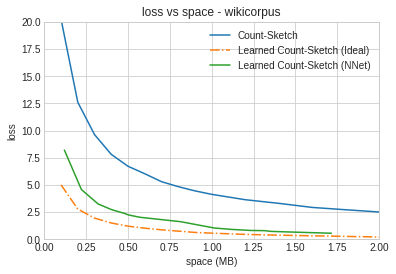

In [43]:
ALGO = 'Count-Sketch'
COUNT_MIN = 'param_results/count_sketch/cmin_wikicorpus.npz'
LEARNED = ['param_results/cutoff_count_sketch_param/cmin_wikicorpus_test.npz']
PERFECT = 'param_results/cutoff_count_sketch_param_perfect/cmin_wikicorpus_test.npz'
LOOKUP_TABLE ='param_results/lookup_table_count_sketch/cmin_wikicorpus_test.npz' 
MODEL_NAMES = ["Learned Count-Sketch (NNet)"]
TITLE = 'wikicorpus'
MODEL_SIZES = [model_size]
LOOKUP_SIZE = [0.0035]
X_LIM = [0,2]
Y_LIM = [0,20]

plvs = PlotLossVsSpace(
        count_min=COUNT_MIN,
        learned_cmin=LEARNED,
        model_names=MODEL_NAMES,
        perfect_ccm=PERFECT,
        lookup_table_ccm=None,
        model_sizes=MODEL_SIZES,
        lookup_size=LOOKUP_SIZE,
        x_lim=X_LIM,
        y_lim=Y_LIM,
        title=TITLE,
        algo=ALGO,
    )

plvs.run()